# 使用梯度上升法求解主成分

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
X=np.empty((100,2))
X[:,0]=np.random.uniform(0.,100.,size=100)
X[:,1]=0.75*X[:,0]+3.+np.random.normal(0.,10.,size=100)

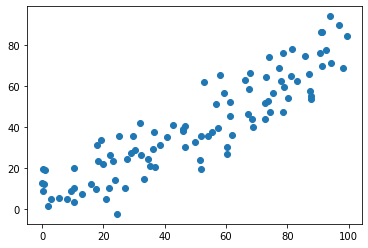

In [44]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### demean

In [45]:
def demean(X):
    return X-np.mean(X,axis=0)

In [46]:
X_demean=demean(X)

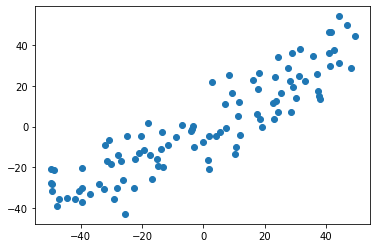

In [47]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [48]:
np.mean(X_demean[:,0])

1.1084466677857563e-14

In [49]:
np.mean(X_demean[:,1])

5.542233338928782e-15

### 梯度上升法

In [50]:
def d(w,X):
    return np.sum((X.dot(w)**2))/len(X)

In [51]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [52]:
def df_debug(w,X,epsilon=0.0001):
    res=np.empty(len(w))
    for i in range(len(w)):
        w_1=w.copy()
        w_1[i]+=epsilon
        w_2=w.copy()
        w_2[i]-=epsilon
        res[i]=(f(w_1,X)-f(w_2,X))/(2*epsilon)
    return res

In [53]:
def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    
    w=direction(initial_w)
    cur_iter=0
    
    while cur_iter<n_iters:
        gradient=df(w,X)
        last_w=w
        w=w+eta*gradient
        w=direction(w) #注意1：每次求一个单位方向
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
            
        cur_iter+=1
    return w
            

In [54]:
initial_w = np.random.random(X.shape[1])# 注意2：不能用0向量开始
initial_w

array([0.16684649, 0.16608691])

In [55]:
eta=0.001

In [56]:
# 注意3： 不能使用StandardScaler标准化数据

In [57]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.78034328, 0.6253514 ])

In [58]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.78034328, 0.6253514 ])

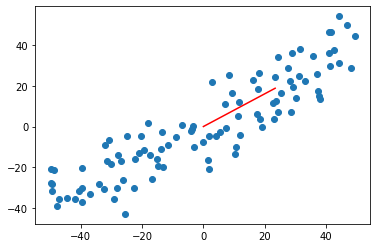

In [61]:
w=gradient_ascent(df_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color="r")
plt.show()

In [64]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3. 

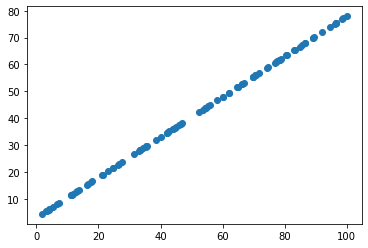

In [65]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [66]:
X2_demean = demean(X2)

In [69]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

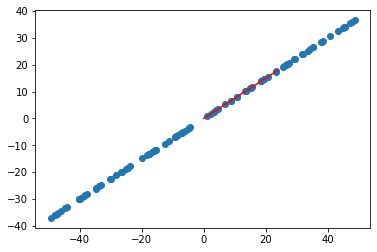

In [70]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color="r")
plt.show()